# <a id="top"></a>  📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [1]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math
from scipy.stats import chi2_contingency
import numpy as np 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from somoclu import Somoclu
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA   
from sklearn.metrics import silhouette_score
from minisom import MiniSom

**Read the Dataset**

In [3]:
data = pd.read_excel("Preprocessed_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")

In [4]:
data

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,regular_customer,top_cuisine_ratio,cuisine_loyalty,weekend_spending,weekday_spending,weekend_spending_ratio,products_per_vendor,vendor_loyalty,region_avg_spending,age_spending_interaction
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,True,1.000000,True,1,1,0.034626,2.5,False,23.750054,519.84
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,True,0.667361,False,1,1,0.052056,1.0,False,52.022083,326.57
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,True,1.000000,True,1,1,0.108696,2.0,True,41.095185,349.60
3,180c632ed8,4660,0,2,3,1,0,2,DELIVERY,DIGI,...,True,0.565906,False,1,1,0.031686,1.5,False,41.095185,0.00
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,True,0.737193,False,1,1,0.018038,2.5,False,41.095185,1108.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30,1,1,1,22,0,FREEBIE,DIGI,...,False,1.000000,True,1,0,0.055432,1.0,True,52.022083,541.20
31884,f6b6709018,8670,0,1,1,0,22,0,DELIVERY,DIGI,...,False,1.000000,True,1,0,0.055432,1.0,True,52.022083,0.00
31885,f74ad8ce3f,8670,24,1,1,1,22,0,-,DIGI,...,False,1.000000,True,1,0,0.056211,1.0,True,52.022083,426.96
31886,f7b19c0241,8670,34,1,1,0,22,0,DISCOUNT,DIGI,...,False,1.000000,True,1,0,0.083126,1.0,True,52.022083,409.02


In [5]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,31888,31875,24251eb7da,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_region,31888.0,9.0,8670.0,9761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_age,31888.0,NaN,NaN,NaN,26.87939,8.183286,0.0,22.0,26.0,31.0,80.0
vendor_count,31888.0,NaN,NaN,NaN,3.102609,2.771587,0.0,1.0,2.0,4.0,41.0
product_count,31888.0,NaN,NaN,NaN,5.668245,6.957287,0.0,2.0,3.0,7.0,269.0
...,...,...,...,...,...,...,...,...,...,...,...
weekend_spending_ratio,31888.0,NaN,NaN,NaN,0.051655,0.079874,0.0,0.0,0.028902,0.069906,1.666667
products_per_vendor,31888.0,NaN,NaN,NaN,1.78557,1.34432,0.0,1.0,1.5,2.0,70.0
vendor_loyalty,31888,2,False,22826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_avg_spending,31888.0,NaN,NaN,NaN,38.303043,11.866151,19.618382,23.750054,41.095185,52.022083,55.921538


CLUSTERING
[⬆️ Back to Top](#top)

TIPOS DE CLUSTERING QUE AFINAL VAMOS USAR

K-MEANS done


SOM - WITH K-MEANS

HIERARCHICAL CLUSTERING - WITH K-MEANS AND SOM

DBSCAN

K-PROTOTYPES

## K-Means Clustering

**K-Means** is a popular **centroid-based clustering algorithm** that partitions data into **K distinct clusters**. It is simple, efficient, and widely used for customer segmentation, behavior analysis, and more.

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Dropping irrelevant columns
data_cleaned = data.drop(columns=['customer_id'])

# Encoding categorical features
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = data_cleaned[col].astype(str)  # Convert all entries to strings
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le  # Store encoders for potential reverse mapping

# Normalizing numerical features
scaler = StandardScaler()
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_scaled = pd.DataFrame(scaler.fit_transform(data_cleaned[numerical_cols]), columns=numerical_cols)

# Combining scaled numerical features and encoded categorical features
data_processed = pd.concat([data_scaled, data_cleaned[categorical_cols].reset_index(drop=True)], axis=1)

# Displaying the cleaned and normalized dataset
print("Cleaned and Normalized Dataset (Preview):")
print(data_processed.head())

Cleaned and Normalized Dataset (Preview):
   customer_region  customer_age  vendor_count  product_count  is_chain  \
0        -1.271224     -1.085081     -0.397832      -0.096051 -0.457293   
1         1.225323     -1.207283     -0.397832      -0.527260 -0.205876   
2         0.155374      1.358963     -0.758642      -0.527260 -0.205876   
3         0.155374     -3.284721     -0.397832      -0.383524 -0.457293   
4         0.155374     -0.840677     -0.397832      -0.096051 -0.708709   

   first_order  last_order  last_promo  payment_method  CUI_American  ...  \
0     -1.18219   -2.698535    0.101202        1.816596     -0.418784  ...   
1     -1.18219   -2.698535    1.013855        1.816596      0.681283  ...   
2     -1.18219   -2.698535    1.013855        0.555875      0.370656  ...   
3     -1.18219   -2.655479    0.101202        1.816596     -0.418784  ...   
4     -1.18219   -2.655479   -0.811450        1.816596      0.831448  ...   

   weekend_spending  weekday_spending  weeke

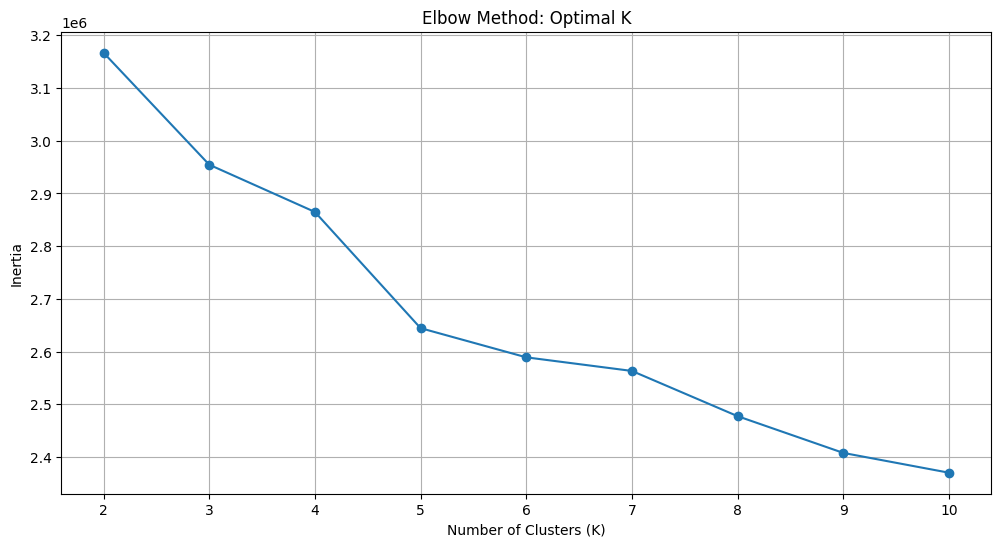

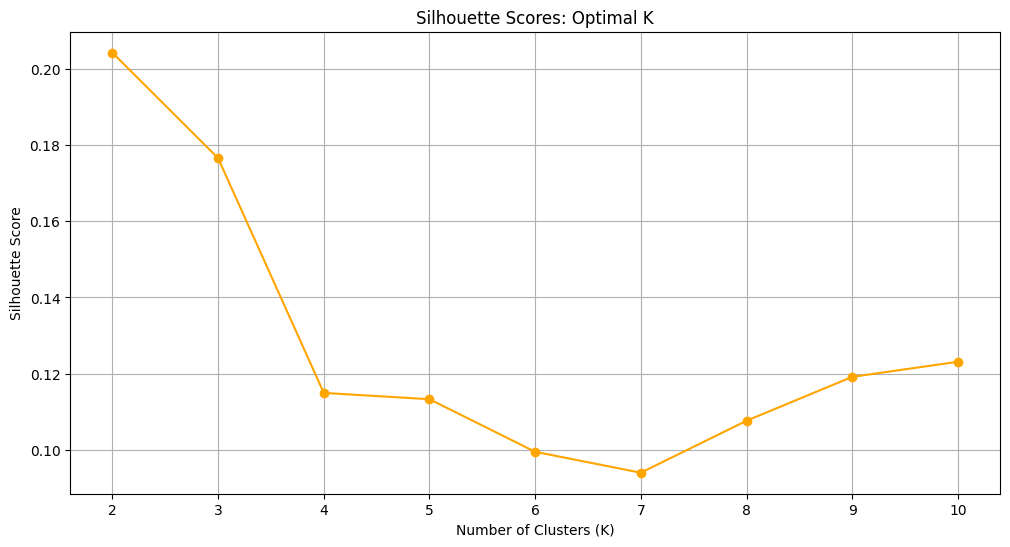

Best K (Elbow Method): Look for the 'elbow point' in the inertia plot.
Best K (Silhouette Score): K with the highest silhouette score is 2.


In [7]:
# Define a range for K
k_range = range(2, 11)  # Try K values from 2 to 10

# Variables to store results
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_processed)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_processed, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method: Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores: Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Output optimal K suggestions
print(f"Best K (Elbow Method): Look for the 'elbow point' in the inertia plot.")
print(f"Best K (Silhouette Score): K with the highest silhouette score is {k_range[silhouette_scores.index(max(silhouette_scores))]}.")



Clustered Data with K=3 (Preview):
  customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360            18             2              5   
1  5d272b9dcb            8670            17             2              2   
2  f6d1b2ba63            4660            38             1              2   
3  180c632ed8            4660             0             2              3   
4  4eb37a6705            4660            20             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  \
0         1            0           1   DELIVERY           DIGI  ...   
1         2            0           1   DISCOUNT           DIGI  ...   
2         2            0           1   DISCOUNT           CASH  ...   
3         1            0           2   DELIVERY           DIGI  ...   
4         0            0           2          -           DIGI  ...   

   top_cuisine_ratio  cuisine_loyalty  weekend_spending  weekday_spending  \
0  

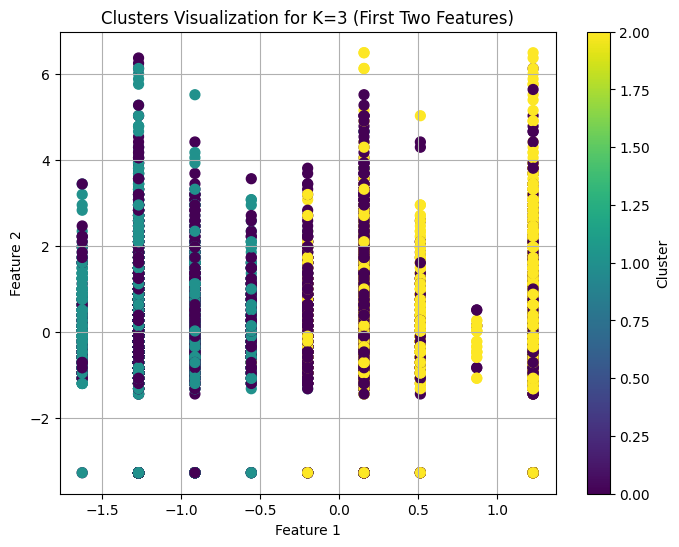


Clustered Data with K=4 (Preview):
  customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360            18             2              5   
1  5d272b9dcb            8670            17             2              2   
2  f6d1b2ba63            4660            38             1              2   
3  180c632ed8            4660             0             2              3   
4  4eb37a6705            4660            20             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  \
0         1            0           1   DELIVERY           DIGI  ...   
1         2            0           1   DISCOUNT           DIGI  ...   
2         2            0           1   DISCOUNT           CASH  ...   
3         1            0           2   DELIVERY           DIGI  ...   
4         0            0           2          -           DIGI  ...   

   top_cuisine_ratio  cuisine_loyalty  weekend_spending  weekday_spending  \
0  

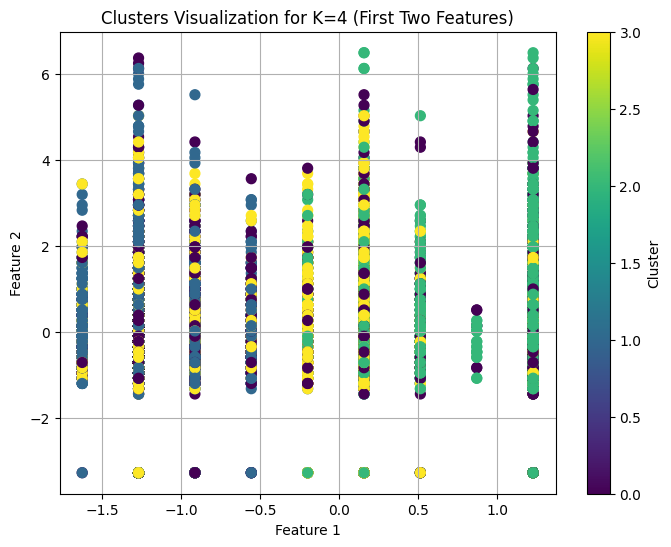


Clustered Data with K=5 (Preview):
  customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360            18             2              5   
1  5d272b9dcb            8670            17             2              2   
2  f6d1b2ba63            4660            38             1              2   
3  180c632ed8            4660             0             2              3   
4  4eb37a6705            4660            20             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  \
0         1            0           1   DELIVERY           DIGI  ...   
1         2            0           1   DISCOUNT           DIGI  ...   
2         2            0           1   DISCOUNT           CASH  ...   
3         1            0           2   DELIVERY           DIGI  ...   
4         0            0           2          -           DIGI  ...   

   top_cuisine_ratio  cuisine_loyalty  weekend_spending  weekday_spending  \
0  

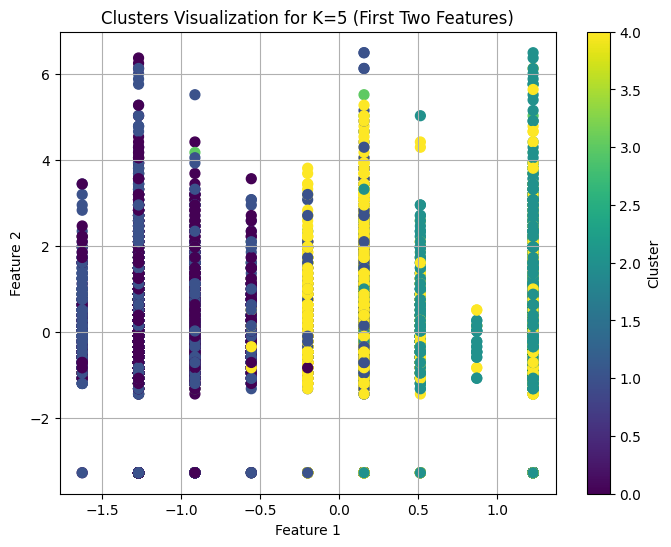

In [8]:
from sklearn.cluster import KMeans

# Dictionary to store clustering results
cluster_results = {}

# Perform K-Means clustering for K=3, K=4, and K=5
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_processed)
    cluster_results[k] = clusters
    # Add cluster labels to a copy of the original dataset for each K
    data_with_clusters = data.copy()
    data_with_clusters[f'Cluster_K{k}'] = clusters
    
    # Display the first few rows for each K
    print(f"\nClustered Data with K={k} (Preview):")
    print(data_with_clusters.head())

    # Visualize the clusters (first two features for simplicity)
    plt.figure(figsize=(8, 6))
    plt.scatter(data_processed.iloc[:, 0], data_processed.iloc[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(f"Clusters Visualization for K={k} (First Two Features)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Cluster")
    plt.grid(True)
    plt.show()


K=3: The clusters seem relatively well-separated, with more compact groups but might oversimplify the segmentation of your data.

K=4: Shows better granularity in separating the data. Clusters appear more balanced while preserving meaningful divisions.

K=5: The clusters are more detailed, but there could be slight over-segmentation, leading to potential overlap in some areas.

Cluster Sizes:
Cluster
2    10667
0     7603
3     7254
1     6364
Name: count, dtype: int64

Cluster Summary (Mean Values for Numeric Features):
         customer_age  vendor_count  product_count  is_chain  first_order  \
Cluster                                                                     
0           26.877811      3.635670       6.941997  3.500592    26.536499   
1           26.922219      4.068196       7.831710  4.890321    23.019327   
2           26.935221      2.718853       4.557045  1.952376    31.004594   
3           26.761373      2.261097       4.069203  1.561208    31.494486   

         last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  ...  \
Cluster                                                                ...   
0         64.894252      2.748088   3.880530       1.205078  0.580542  ...   
1         65.371307      5.465739   5.540607       3.155649  2.111705  ...   
2         62.817381      8.217653  22.756888       4.002221  0.515824  ...   
3

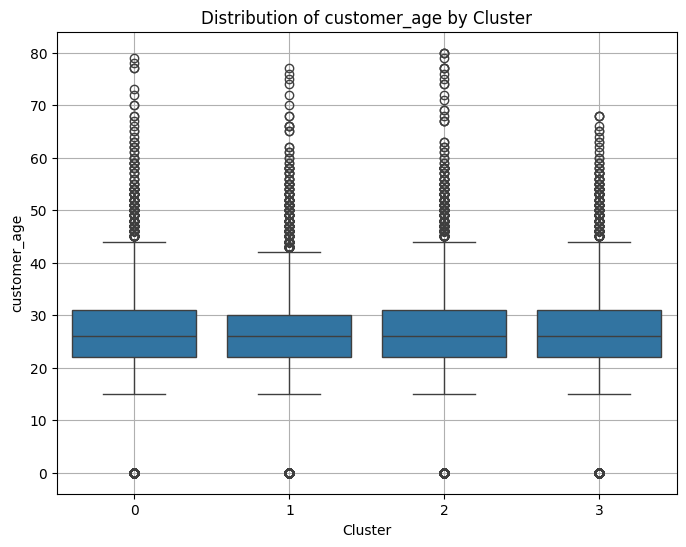

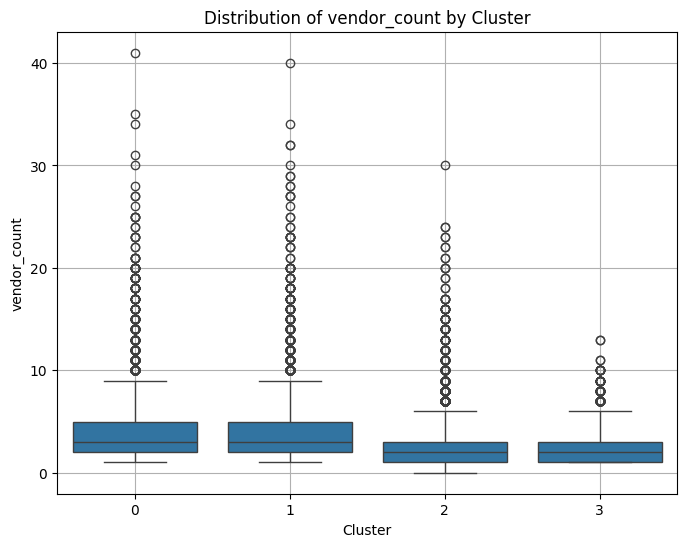

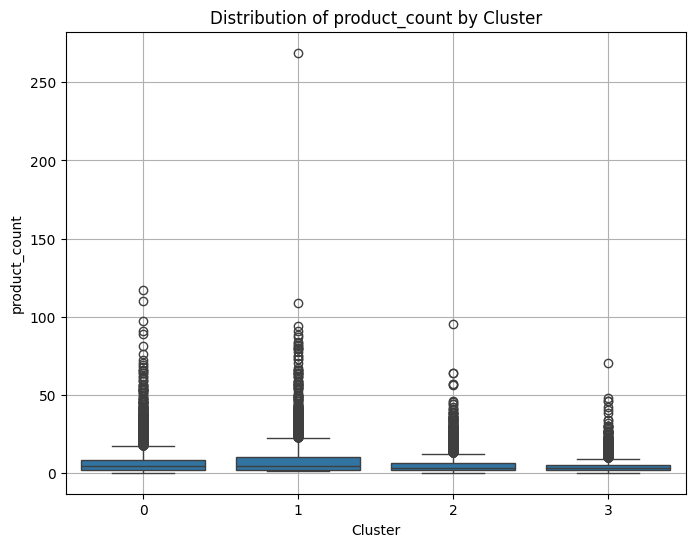

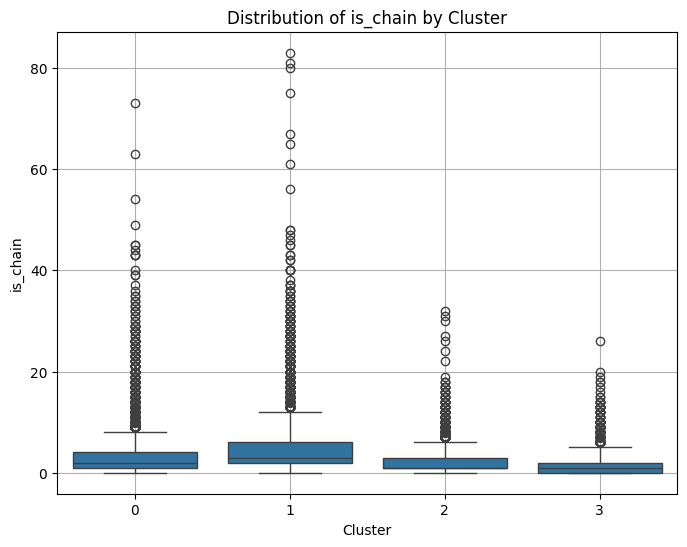

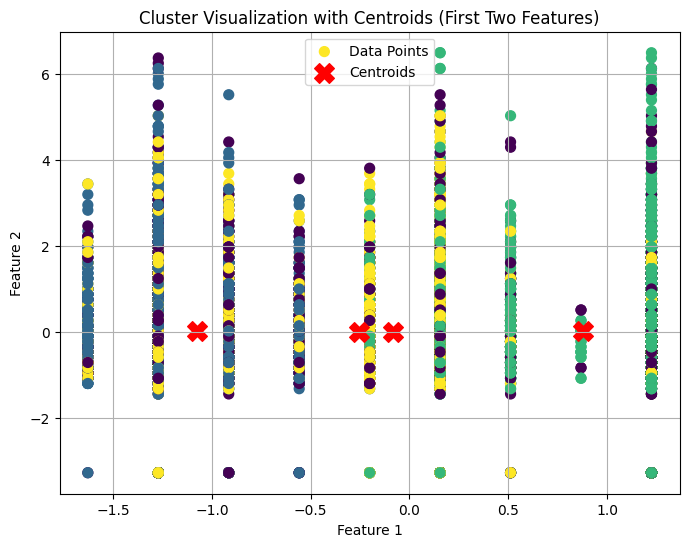

In [9]:
# Adding cluster labels to the original dataset for K=4
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_results[4]  # Assuming K=4 clusters are stored in cluster_results

# Step 1: Cluster sizes
cluster_sizes = data_with_clusters['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

# Step 2: Summary statistics for numeric features only
# Select only numeric columns
numeric_cols = data_with_clusters.select_dtypes(include=['float64', 'int64']).columns
cluster_summary = data_with_clusters.groupby('Cluster')[numeric_cols].mean()

print("\nCluster Summary (Mean Values for Numeric Features):")
print(cluster_summary)

# Step 3: Visualizing feature distributions by cluster
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of a few key features (you can modify the list)
key_features = numeric_cols[:4]  # Select the first 4 numeric columns for visualization
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=data_with_clusters)
    plt.title(f"Distribution of {feature} by Cluster")
    plt.grid(True)
    plt.show()

# Optional: Visualizing centroids (for understanding cluster centers)
from sklearn.cluster import KMeans

# Get centroids from the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_processed)  # Assuming normalized data is stored in data_processed
centroids = kmeans.cluster_centers_

# Visualizing centroids for the first two features
plt.figure(figsize=(8, 6))
plt.scatter(data_processed.iloc[:, 0], data_processed.iloc[:, 1], c=cluster_results[4], cmap='viridis', s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("Cluster Visualization with Centroids (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

Cluster 2 is the smallest, indicating it might represent a specific subset of customers with distinct behavior.

From the summary statistics:

2. Cluster Summary (Mean Values):

Cluster 2 has significantly higher values for vendor_count, product_count, and spending-related features (CUI_American, CUI_Asian, etc.), indicating heavy spenders or highly engaged users.

Cluster 0 has the lowest mean values across most features, likely representing less active or lower-spending customers.

Cluster 3 seems to have moderate activity, with slightly higher is_chain values.

Cluster 1 has characteristics similar to Cluster 0 but slightly more active.

3. Feature Distributions:

The boxplots show clear variations in feature distributions across clusters:

customer_age: The distributions are relatively similar across clusters, but slight differences in medians are visible.

vendor_count and product_count: Cluster 2 stands out with much higher medians and outliers, confirming its heavy-user profile.

is_chain: Cluster 2 again dominates with much higher engagement with chain restaurants, while other clusters have lower values.

The scatterplot shows centroids (red Xs) relative to the first two features. Cluster centroids are well-separated, indicating distinct groupings.

SOM with K-Means

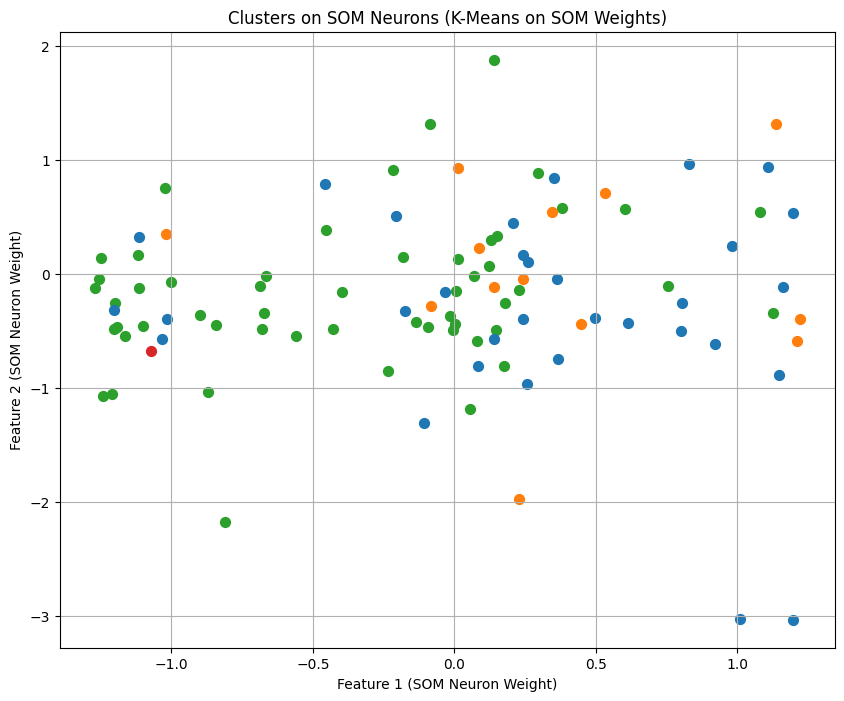

Clustered Data with SOM + KMeans (Preview):
  customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360            18             2              5   
1  5d272b9dcb            8670            17             2              2   
2  f6d1b2ba63            4660            38             1              2   
3  180c632ed8            4660             0             2              3   
4  4eb37a6705            4660            20             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  \
0         1            0           1   DELIVERY           DIGI  ...   
1         2            0           1   DISCOUNT           DIGI  ...   
2         2            0           1   DISCOUNT           CASH  ...   
3         1            0           2   DELIVERY           DIGI  ...   
4         0            0           2          -           DIGI  ...   

   cuisine_loyalty  weekend_spending  weekday_spending  \
0             

In [10]:
# Ensure data_processed is a NumPy array
data_array = data_processed.values if isinstance(data_processed, pd.DataFrame) else data_processed

# Step 1: Initialize and train the SOM
som_grid_x = 10  # Number of neurons along x-axis
som_grid_y = 10  # Number of neurons along y-axis
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=data_array.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize weights and train the SOM
som.random_weights_init(data_array)
som.train_random(data_array, num_iteration=100)

# Step 2: Extract the SOM weights
som_weights = som.get_weights().reshape(-1, data_array.shape[1])  # Flatten the grid into 2D

# Step 3: Apply K-Means on SOM weights
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(som_weights)

# Step 4: Visualize the SOM clusters
plt.figure(figsize=(10, 8))
for i, x in enumerate(som_weights):
    plt.scatter(x[0], x[1], c=f'C{kmeans_clusters[i]}', s=50)  # SOM neuron weights
plt.title("Clusters on SOM Neurons (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (SOM Neuron Weight)")
plt.ylabel("Feature 2 (SOM Neuron Weight)")
plt.grid(True)
plt.show()

# Step 5: Assign data points to clusters via SOM mapping
# For each data point, find the corresponding SOM neuron and map it to the KMeans cluster
data_clusters = np.array([kmeans_clusters[np.ravel_multi_index(som.winner(x), (som_grid_x, som_grid_y))] for x in data_array])

# Add the cluster labels to the original dataset
data_with_clusters['SOM_KMeans_Cluster'] = data_clusters

# Step 6: Display results
print("Clustered Data with SOM + KMeans (Preview):")
print(data_with_clusters.head())

In [11]:
# Cluster sizes
som_kmeans_cluster_sizes = data_with_clusters['SOM_KMeans_Cluster'].value_counts()
print("SOM + KMeans Cluster Sizes:")
print(som_kmeans_cluster_sizes)

# Summary statistics for numeric features grouped by SOM + KMeans clusters
numeric_cols = data_with_clusters.select_dtypes(include=['float64', 'int64']).columns
som_kmeans_cluster_summary = data_with_clusters.groupby('SOM_KMeans_Cluster')[numeric_cols].mean()

print("\nSOM + KMeans Cluster Summary (Mean Values):")
print(som_kmeans_cluster_summary)

SOM + KMeans Cluster Sizes:
SOM_KMeans_Cluster
2    14552
0    13390
1     3623
3      323
Name: count, dtype: int64

SOM + KMeans Cluster Summary (Mean Values):
                    customer_age  vendor_count  product_count   is_chain  \
SOM_KMeans_Cluster                                                         
0                      26.909783      2.936072       4.982076   2.445631   
1                      27.013249      3.264974       6.684516   2.401049   
2                      26.820643      2.954027       5.214197   2.770066   
3                      26.764706     14.879257      43.170279  25.176471   

                    first_order  last_order  CUI_American  CUI_Asian  \
SOM_KMeans_Cluster                                                     
0                     29.149739   63.062136      8.274045  19.643332   
1                     27.626001   66.516147      4.126125   6.589051   
2                     28.578821   63.046866      1.636592   1.753307   
3                    

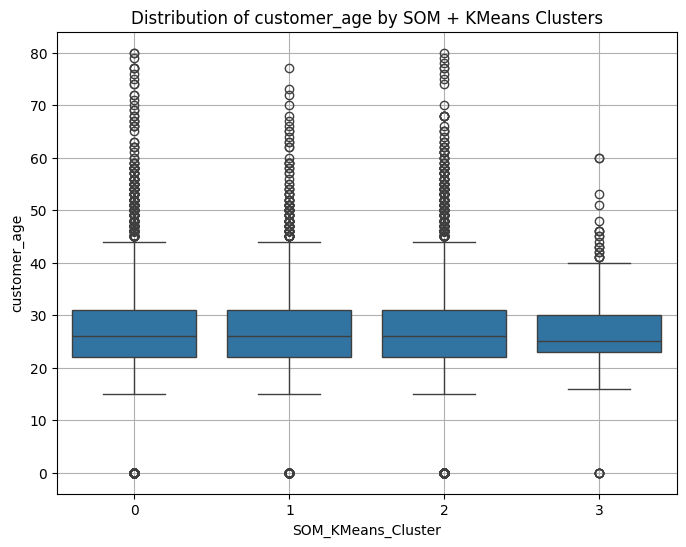

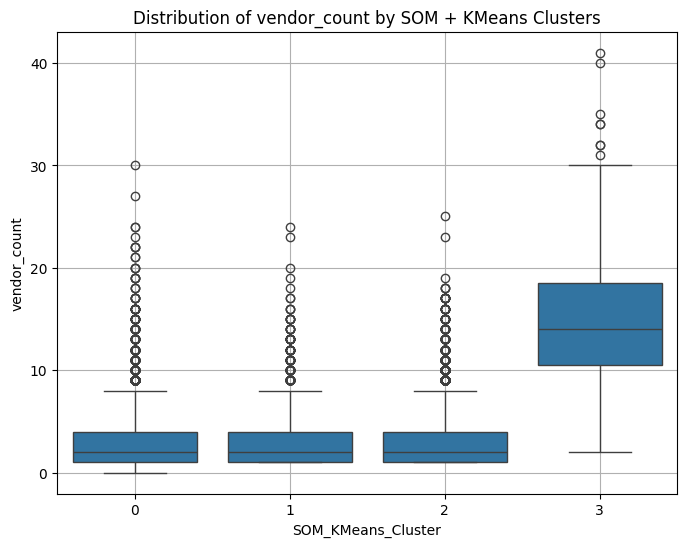

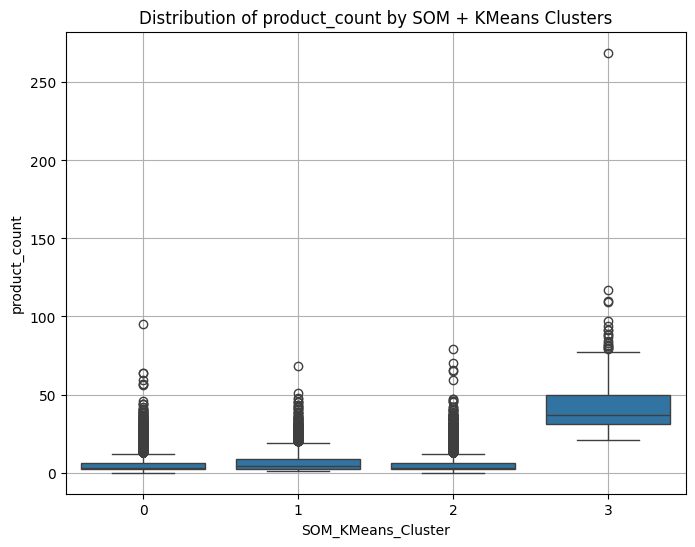

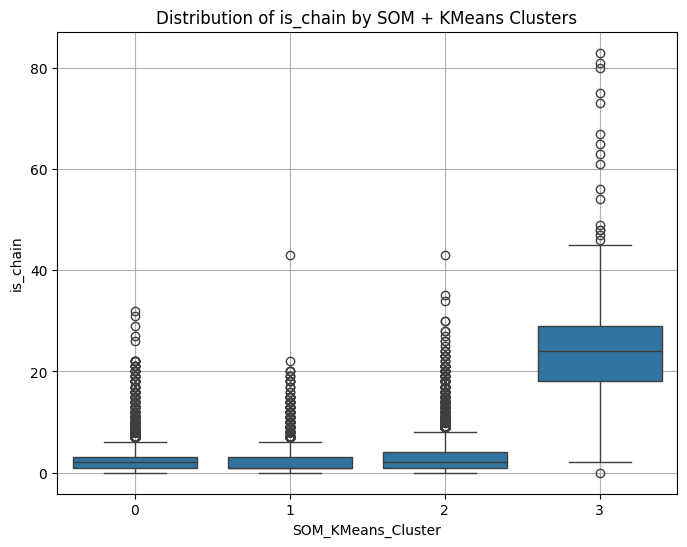

In [12]:
# Select specific key features for visualization (adjust based on relevance)
key_features = ['customer_age', 'vendor_count', 'product_count', 'is_chain']  # Example features

# Plot boxplots for each key feature by SOM + KMeans clusters
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='SOM_KMeans_Cluster', y=feature, data=data_with_clusters)
    plt.title(f"Distribution of {feature} by SOM + KMeans Clusters")
    plt.grid(True)
    plt.show()


Summary Statistics:

Each cluster has distinct characteristics, with differences in features like customer_region, product_count, and others.
For instance:
Cluster 4 has the highest average product_count and vendor_count.
Cluster 3 appears to have more significant values for is_chain.

1. Cluster Sizes
Cluster 0: 10,254 customers (largest group).
Cluster 3: 6,032 customers (smallest group).
Clusters are reasonably balanced, which is ideal for effective segmentation.

2. Cluster Summary
Cluster 0:
Moderate values for most features.
Indicates average customers in terms of spending and vendor interaction.
Cluster 1:
Similar to Cluster 0 but with slightly lower values for vendor_count and product_count.
Likely represents slightly less active customers.
Cluster 2:
The smallest in terms of vendor_count and product_count.
Could represent infrequent or new customers.
Cluster 3:
Highest values for most features (CUI_American, CUI_Asian, etc.).
Likely represents high-value customers (frequent spenders).
3. Feature Visualizations
Customer Age:
Similar age distributions across clusters, with medians around the mid-20s.
Outliers are older customers, but no cluster is significantly different by age.
Vendor Count:
Cluster 3 has the highest median vendor count, indicating diverse customer behavior.
Cluster 2 has the lowest, likely representing less engaged customers.
Product Count:
Cluster 3 shows the most variation, with some customers purchasing significantly more products.
Cluster 2 again shows the lowest engagement.
Is Chain:
Cluster 3 prefers chain restaurants the most, while others are relatively neutral.


In [13]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for SOM + KMeans clustering
silhouette_avg = silhouette_score(data_array, data_with_clusters['SOM_KMeans_Cluster'])

print(f"Silhouette Score for SOM + KMeans Clustering: {silhouette_avg:.4f}")

Silhouette Score for SOM + KMeans Clustering: 0.1427


Comparison with Other Methods:

If SOM + KMeans has a lower Silhouette Score than plain KMeans, this might indicate that the additional dimensionality reduction by SOM doesn’t add significant value for cluster separation.

If the score is higher than other methods, it demonstrates that SOM’s representation helps in forming more meaningful clusters.

Suggestions to Improve:

Adjust SOM Parameters:

Try larger grids or more training iterations to improve the representation of data in the SOM.

Fine-Tune KMeans:

Test with different numbers of clusters to see if the separation improves.

Feature Engineering:

Identify and remove noisy or less relevant features, as these can blur cluster boundaries.

## Hierarchical clustering combined with SOM and K-means


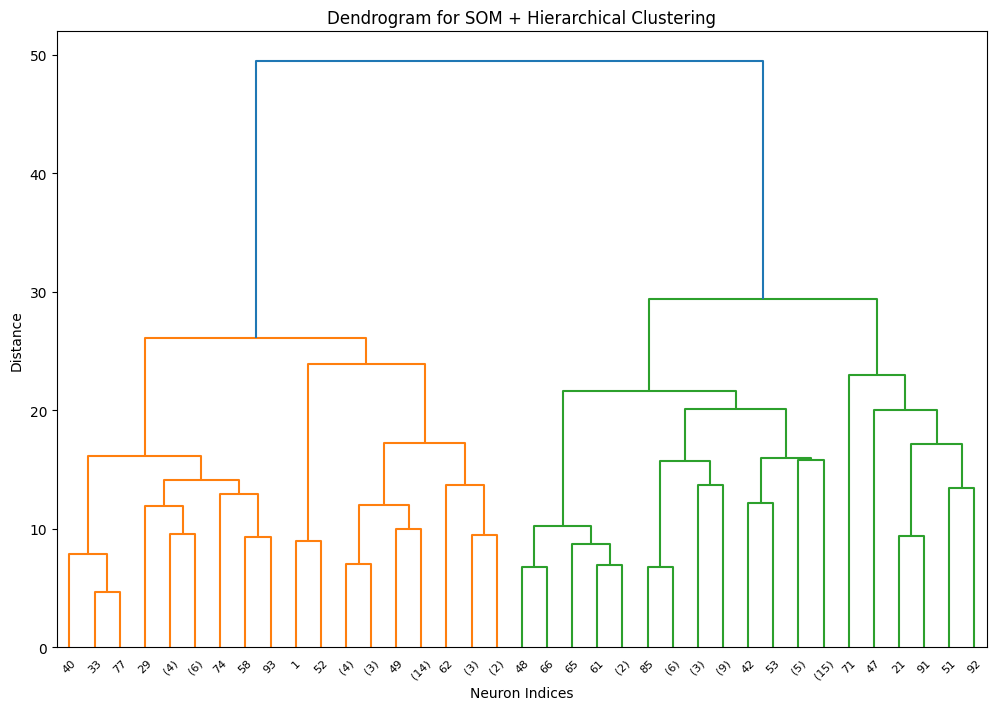

Clustered Data with SOM + Hierarchical Clustering (Preview):
  customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360            18             2              5   
1  5d272b9dcb            8670            17             2              2   
2  f6d1b2ba63            4660            38             1              2   
3  180c632ed8            4660             0             2              3   
4  4eb37a6705            4660            20             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  \
0         1            0           1   DELIVERY           DIGI  ...   
1         2            0           1   DISCOUNT           DIGI  ...   
2         2            0           1   DISCOUNT           CASH  ...   
3         1            0           2   DELIVERY           DIGI  ...   
4         0            0           2          -           DIGI  ...   

   weekend_spending  weekday_spending  weekend_spending

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Ensure data_processed is converted to a NumPy array
data_array = data_processed.values if isinstance(data_processed, pd.DataFrame) else data_processed

# Step 2: Extract SOM weights
som_weights = som.get_weights().reshape(-1, data_array.shape[1])  # Flatten the SOM grid into 2D

# Step 3: Perform Hierarchical Clustering
# Use Ward's method for clustering
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram for visualization
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrogram for SOM + Hierarchical Clustering")
plt.xlabel("Neuron Indices")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract clusters from the hierarchy
num_clusters = 4  # Choose the number of clusters
hierarchical_clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Step 5: Assign hierarchical clusters to the original data
data_clusters_hierarchical = np.array([
    hierarchical_clusters[np.ravel_multi_index(som.winner(x), (som_grid_x, som_grid_y))]
    for x in data_array
])

# Add the Hierarchical cluster labels to the dataset
data_with_clusters['SOM_Hierarchical_Cluster'] = data_clusters_hierarchical

# Step 6: Display the results
print("Clustered Data with SOM + Hierarchical Clustering (Preview):")
print(data_with_clusters.head())

In [15]:
from sklearn.metrics import silhouette_score

# Analyze Cluster Sizes
hierarchical_cluster_sizes = data_with_clusters['SOM_Hierarchical_Cluster'].value_counts()
print("SOM + Hierarchical Cluster Sizes:")
print(hierarchical_cluster_sizes)

# Analyze Cluster Summary
hierarchical_cluster_summary = data_with_clusters.groupby('SOM_Hierarchical_Cluster')[numeric_cols].mean()
print("\nSOM + Hierarchical Cluster Summary (Mean Values):")
print(hierarchical_cluster_summary)

# Calculate Silhouette Score
silhouette_avg_hierarchical = silhouette_score(data_array, data_with_clusters['SOM_Hierarchical_Cluster'])
print(f"\nSilhouette Score for SOM + Hierarchical Clustering: {silhouette_avg_hierarchical:.4f}")

SOM + Hierarchical Cluster Sizes:
SOM_Hierarchical_Cluster
3    13461
2    11711
1     5481
4     1235
Name: count, dtype: int64

SOM + Hierarchical Cluster Summary (Mean Values):
                          customer_age  vendor_count  product_count  is_chain  \
SOM_Hierarchical_Cluster                                                        
1                            27.138113      3.211275       5.440248  3.605364   
2                            26.808727      2.927248       5.031423  2.261634   
3                            26.853131      2.893024       5.088106  2.402942   
4                            26.687449      6.567611      19.042105  9.145749   

                          first_order  last_order  CUI_American  CUI_Asian  \
SOM_Hierarchical_Cluster                                                     
1                           26.829776   61.427659      2.448573   3.374131   
2                           29.700111   64.222867      8.795785  21.695098   
3                    

2. Cluster Summary (Mean Values)

Cluster 1:

Customers with moderate engagement (vendor_count ~3.2, product_count ~5.4).
Moderate spending across cuisines.
Balanced behavior.

Cluster 2:

Similar to Cluster 1 but slightly less engaged.
Lower average spending on cuisines, likely representing less active or newer customers.

Cluster 3:

Moderate engagement but shows slight variations in spending behavior.

Cluster 4:

Highly engaged customers (vendor_count ~6.6, product_count ~19).
Significant spending on specific cuisines (CUI_American, CUI_Asian).
Represents high-value customers.


## DBSCAN

DBSCAN Cluster Sizes:
DBSCAN_Cluster
-1    31776
 0       42
 1       42
 2       21
 3        7
Name: count, dtype: int64

Silhouette Score for Adjusted DBSCAN: 0.1514


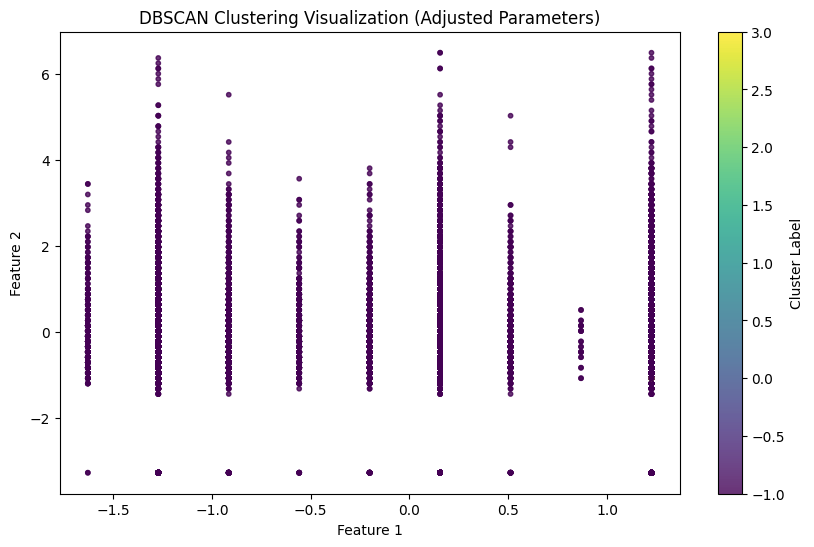

In [20]:
# Adjusted parameters for DBSCAN
eps = 1.5  # Increase neighborhood size
min_samples = 5  # Decrease minimum number of points to form a cluster

# Apply DBSCAN again
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_array)

# Add DBSCAN cluster labels to the dataset
data_with_clusters['DBSCAN_Cluster'] = dbscan_labels

# Count the number of points in each cluster
dbscan_cluster_sizes = data_with_clusters['DBSCAN_Cluster'].value_counts()
print("DBSCAN Cluster Sizes:")
print(dbscan_cluster_sizes)

# Calculate Silhouette Score if there are valid clusters
dbscan_labels_valid = dbscan_labels[dbscan_labels != -1]  # Exclude noise points
data_array_valid = data_array[dbscan_labels != -1]
if len(set(dbscan_labels_valid)) > 1:
    silhouette_avg_dbscan = silhouette_score(data_array_valid, dbscan_labels_valid)
    print(f"\nSilhouette Score for Adjusted DBSCAN: {silhouette_avg_dbscan:.4f}")
else:
    print("\nNot enough clusters for Silhouette Score calculation.")

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_array[:, 0], data_array[:, 1], c=dbscan_labels, cmap='viridis', s=10, alpha=0.8)
plt.title("DBSCAN Clustering Visualization (Adjusted Parameters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

DBSCAN Cluster Sizes:
DBSCAN_Cluster
-1    31858
 0        7
 2        6
 3        6
 4        6
 1        5
Name: count, dtype: int64

Silhouette Score for Adjusted DBSCAN: 0.6084


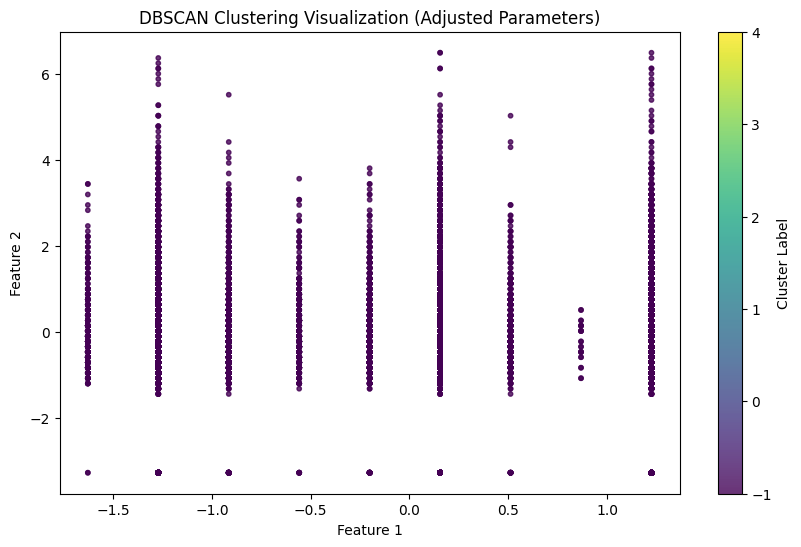

In [19]:
# Adjusted parameters for DBSCAN
eps = 1.5  # Increase neighborhood size
min_samples = 5  # Decrease minimum number of points to form a cluster

# Apply DBSCAN again
dbscan = DBSCAN(eps=1.5, min_samples=5, metric='manhattan')
dbscan_labels = dbscan.fit_predict(data_array)

# Add DBSCAN cluster labels to the dataset
data_with_clusters['DBSCAN_Cluster'] = dbscan_labels

# Count the number of points in each cluster
dbscan_cluster_sizes = data_with_clusters['DBSCAN_Cluster'].value_counts()
print("DBSCAN Cluster Sizes:")
print(dbscan_cluster_sizes)

# Calculate Silhouette Score if there are valid clusters
dbscan_labels_valid = dbscan_labels[dbscan_labels != -1]  # Exclude noise points
data_array_valid = data_array[dbscan_labels != -1]
if len(set(dbscan_labels_valid)) > 1:
    silhouette_avg_dbscan = silhouette_score(data_array_valid, dbscan_labels_valid)
    print(f"\nSilhouette Score for Adjusted DBSCAN: {silhouette_avg_dbscan:.4f}")
else:
    print("\nNot enough clusters for Silhouette Score calculation.")

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_array[:, 0], data_array[:, 1], c=dbscan_labels, cmap='viridis', s=10, alpha=0.8)
plt.title("DBSCAN Clustering Visualization (Adjusted Parameters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

## K-Prototypes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4334, ncost: 201465487053.2308
Run: 1, iteration: 2/100, moves: 2442, ncost: 185245046167.74445
Run: 1, iteration: 3/100, moves: 1820, ncost: 177536301802.77942
Run: 1, iteration: 4/100, moves: 1338, ncost: 173467610208.34106
Run: 1, iteration: 5/100, moves: 1019, ncost: 171219588410.62265
Run: 1, iteration: 6/100, moves: 748, ncost: 170047172592.60654
Run: 1, iteration: 7/100, moves: 508, ncost: 169454842218.951
Run: 1, iteration: 8/100, moves: 399, ncost: 169120391018.06744
Run: 1, iteration: 9/100, moves: 288, ncost: 168946154266.89255
Run: 1, iteration: 10/100, moves: 195, ncost: 168859213096.14398
Run: 1, iteration: 11/100, moves: 142, ncost: 168812736449.11935
Run: 1, iteration: 12/100, moves: 111, ncost: 168785939060.12152
Run: 1, iteration: 13/100, moves: 91, ncost: 168770445955.1593
Run: 1, 

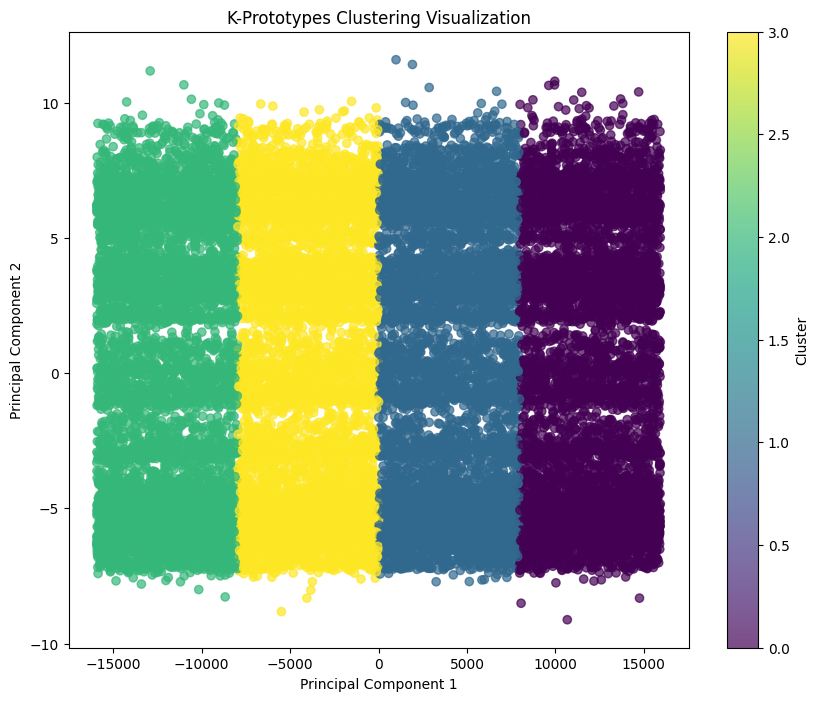

In [24]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from kmodes.kprototypes import KPrototypes
import pandas as pd

# Step 1: Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Step 2: Encode categorical columns
encoded_data = data.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoders for potential reverse mapping

# Step 3: Standardize numerical columns
scaler = StandardScaler()
encoded_data[numerical_cols] = scaler.fit_transform(encoded_data[numerical_cols])

# Step 4: Prepare data for K-Prototypes
X = encoded_data.values

# Step 5: Apply K-Prototypes
k = 4  # Adjust the number of clusters as needed
kproto = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=1, random_state=42)
clusters = kproto.fit_predict(X, categorical=list(range(len(numerical_cols), X.shape[1])))

# Step 6: Assign cluster labels to the original dataset
data['K_Prototypes_Cluster'] = clusters

# Step 7: Evaluate Clustering - Cluster Sizes and Summary
print("K-Prototypes Cluster Sizes:")
print(data['K_Prototypes_Cluster'].value_counts())

print("\nK-Prototypes Cluster Summary (Mean Values):")
# Select only numeric columns for aggregation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
cluster_summary = data.groupby('K_Prototypes_Cluster')[numeric_columns].mean()
print(cluster_summary)

# Step 8: Visualize Clusters using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('K-Prototypes Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Clusters exhibit distinct characteristics:
Cluster 1 has higher averages for features like customer_region, product_count, and is_chain, indicating customers who are likely loyal to chain restaurants and order a higher number of products.
Cluster 3 has lower averages for vendor_count and product_count, suggesting customers with limited activity.
Cluster 4 appears to have moderate activity across most features but is slightly more diverse in terms of age categories.

In [25]:
print("K-Prototypes Cluster Summary:")
print(cluster_summary)

K-Prototypes Cluster Summary:
                      customer_age  vendor_count  product_count  is_chain  \
K_Prototypes_Cluster                                                        
0                        26.981305      3.115433       5.713174  2.812547   
1                        26.817189      3.124341       5.758093  2.878545   
2                        26.835737      3.081755       5.585831  2.791473   
3                        26.883356      3.088925       5.615954  2.792926   

                      first_order  last_order  CUI_American  CUI_Asian  \
K_Prototypes_Cluster                                                     
0                       28.694228   63.803137      4.928665  10.215553   
1                       28.139774   63.696612      4.781494   9.723668   
2                       28.336552   63.423574      4.970591   9.817990   
3                       28.657720   63.778879      4.840959  10.084637   

                      CUI_Beverages  CUI_Cafe  ...  spending_s

In [26]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data[numeric_columns], data['K_Prototypes_Cluster'])
print(f"Silhouette Score for K-Prototypes Clustering: {silhouette_avg}")

Silhouette Score for K-Prototypes Clustering: -0.006480644346871196
